In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as smf
from statsmodels.stats.stattools import durbin_watson
from scipy.interpolate import *
from scipy.stats import ttest_rel
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/macbookpro/Desktop/collector.csv', index_col=0)
data.head()
data.describe()

,T_red,eta_data
count,40.000000,40.000000
mean,0.044102,0.566222
std,0.028902,0.151699
min,0.000300,0.247833
25%,0.017167,0.467023
50%,0.041692,0.587266
75%,0.067918,0.695376
max,0.099099,0.794122


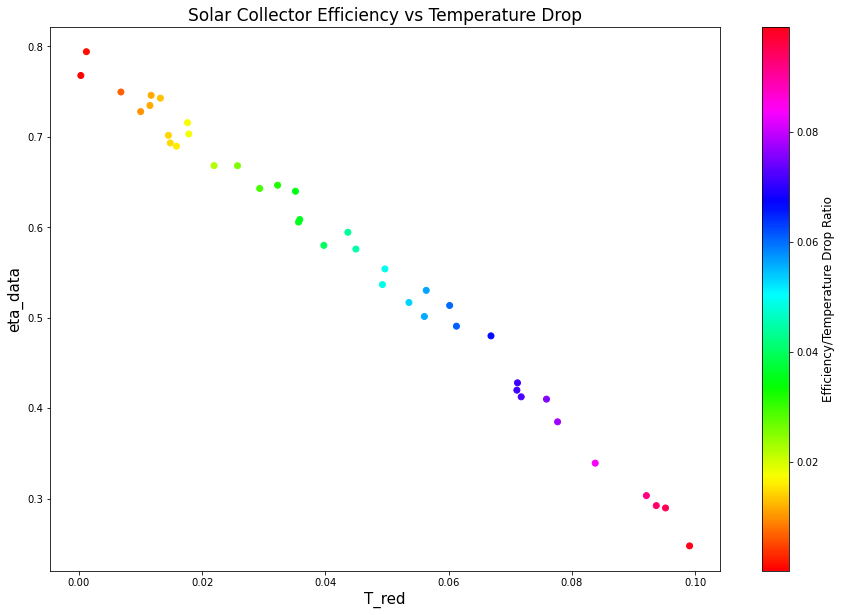

In [3]:
eta_data = data['eta_data']
T_red = data['T_red']
plt.rcParams['figure.figsize'] = (15,10)
plt.scatter(data['T_red'],data['eta_data'], c=T_red, cmap='hsv')
cbar = plt.colorbar()
cbar.set_label('Efficiency/Temperature Drop Ratio', fontsize=12)
plt.xlabel('T_red', fontsize=15)
plt.ylabel('eta_data', fontsize=15)
plt.title('Solar Collector Efficiency vs Temperature Drop', fontsize=17)
plt.show()


In [4]:
data.dtypes
data.isnull().sum()
data.duplicated('T_red')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
dtype: bool

In [5]:
data.duplicated('eta_data')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
dtype: bool

In [6]:
correlations = data.corr()

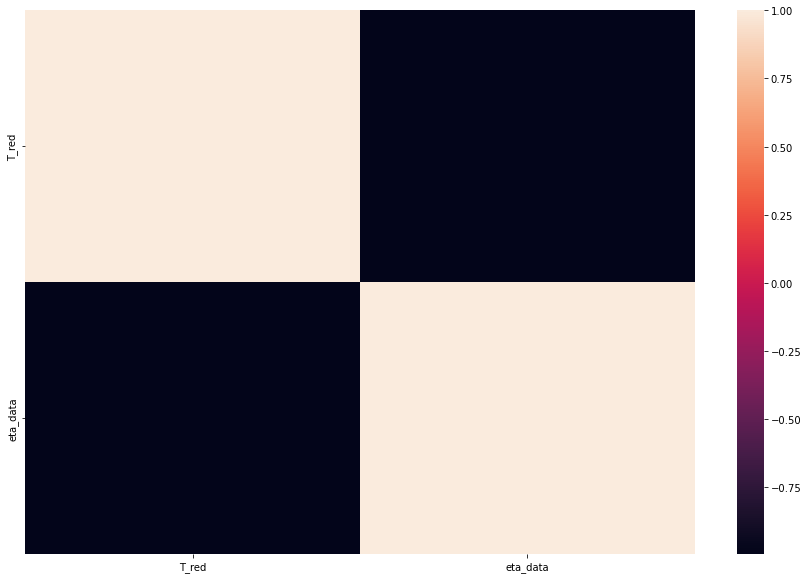

In [7]:
sns.heatmap(correlations)
plt.show()


In [8]:
intercept = smf.add_constant(T_red)
model = smf.OLS(data['eta_data'], intercept)
model1 = model.fit()
model_predict = model1.predict()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               eta_data   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     3093.
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           5.13e-38
Time:                        16:31:21   Log-Likelihood:                 107.41
No. Observations:                  40   AIC:                            -210.8
Df Residuals:                      38   BIC:                            -207.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7963      0.005    161.601      0.000       0.786       0.806
T_red         -5.2168      0.094    -55.614      0.000      -5.407      -5.027
==============================================================================
Omnibus:                        1.268   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.076
Skew:                           0.191   Prob(JB):                        0.584
Kurtosis:                       2.293   Cond. No.                         35.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
dir(model1)


['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c

In [10]:
print('F-value of First Model:', model1.fvalue)


F-value of First Model: 3092.890776750316


In [12]:
polynomial_features = PolynomialFeatures(degree=2)
pf = polynomial_features.fit_transform(intercept)
model = smf.OLS(data['eta_data'], pf)
model2 = model.fit()
model2_predict = model2.predict()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               eta_data   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     2348.
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           1.05e-39
Time:                        16:32:48   Log-Likelihood:                 116.21
No. Observations:                  40   AIC:                            -226.4
Df Residuals:                      37   BIC:                            -221.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2589      0.002    131.954      0.000       0.255       0.263
x1             0.2589      0.002    131.954      0.000       0.255       0.263
x2            -1.9776      0.145    -13.670      0.000      -2.271      -1.684
x3             0.2589      0.002    131.954      0.000       0.255       0.263
x4            -1.9776      0.145    -13.670      0.000      -2.271      -1.684
x5           -13.1003      2.898     -4.521      0.000     -18.972      -7.229
==============================================================================
Omnibus:                        4.877   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                2.185
Skew:                           0.247   Prob(JB):                        0.335
Kurtosis:                       1.967   Cond. No.                     7.18e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.33e-44. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
dir(model2)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c

In [14]:
print('F-value of Second Model:', model2.fvalue)


F-value of Second Model: 2347.6934588650215


In [15]:
print('P-value of First Model:', model1.f_pvalue)
print('Zero Loss Efficiency: '+str(model1.params[0]))
print('Linear Coefficient: '+str(model1.params[1]))

P-value of First Model: 5.127523598185324e-38
Zero Loss Efficiency: 0.7962914081423429
Linear Coefficient: -5.216802437558728


In [16]:
print('P-value of Second Model:', model2.f_pvalue)
print('Zero Loss Efficiency: '+str(model2.params[0]))
print('Linear Coefficient: '+str(model2.params[2]))
print('Quadratic Coefficient: '+str(model2.params[5]))

P-value of Second Model: 1.0537737126905778e-39
Zero Loss Efficiency: 0.2589328311342477
Linear Coefficient: -1.9775664078823467
Quadratic Coefficient: -13.100286061265592


In [17]:
n= 40
y = data['eta_data']
x = data['T_red']
p1 = np.polyfit(x,y,1)
yhat1 = p1[1] + p1[0]*x
COD1 = model1.rsquared
CCOD1 = 1-((1-COD1)*((n-1)/(n-2)))
RMSE1 = model1.mse_model
print('The Corrected Coefficient of Determination: '+str(CCOD1))
print('The Root Mean Squared: '+str(RMSE1))


The Corrected Coefficient of Determination: 0.9875434811429353
The Root Mean Squared: 0.8865937509699445


In [18]:
n=40
y = data['eta_data']
x = data['T_red']
p2 = np.polyfit(x,y,2)
yhat2 = p2[2] + p2[1]*x + p2[0]*x**2
COD2 = model2.rsquared
CCOD2 = 1-((1-COD2)*((n-1)/(n-3)))
RMSE2 = model2.mse_model
print('The Corrected Coefficient of Determination: '+str(CCOD2))
print('The Root Mean Squared: '+str(RMSE2))



The Corrected Coefficient of Determination: 0.9917589156005218
The Root Mean Squared: 0.44523484366145133
